In [6]:
import pytrends
import numpy as np
import pandas as pd
from pytrends.request import TrendReq
%matplotlib inline

In [40]:
#give each term a penalty from 0-10
#the higher the penalty the worse it it
neg_terms={'Is coronavirus a scam': 6, 'chloroquine for coronavirus': 2, 
           'bill gates patent coronavirus': 4, 'did china create coronavirus': 3, 'was coronavirus man made': 8}
import pickle as pkl
pkl.dump(neg_terms,open("neg_terms.pkl",'wb+'))
s_t=[i for i in neg_terms.keys()]

In [41]:
pytrend = TrendReq()
pytrend.build_payload(kw_list=s_t)# Interest by Region
df = pytrend.interest_by_region()

In [42]:
df

,Is coronavirus a scam,chloroquine for coronavirus,bill gates patent coronavirus,did china create coronavirus,was coronavirus man made
geoName,,,,,
Afghanistan,0,100,0,0,0
Albania,0,0,0,0,0
Algeria,0,0,0,0,0
American Samoa,0,0,0,0,0
Andorra,0,0,0,0,0
...,...,...,...,...,...
Western Sahara,0,0,0,0,0
Yemen,0,0,0,0,0
Zambia,0,100,0,0,0


In [43]:
def build_search_penalty_country_dict(neg_terms):
    s_t=[i for i in neg_terms.keys()]
    pytrend = TrendReq()
    pytrend.build_payload(kw_list=s_t)# Interest by Region
    df = pytrend.interest_by_region()
    country_penalty_dict={}
    for i in df.iterrows():
        country=i[0]
        total_penalty=0
        for s_t_idx in range(len(s_t)):
            search_intrest=i[1][s_t_idx]
            total_penalty+=search_intrest*neg_terms[s_t[s_t_idx]] #multiply the penalty by the search term intrest 
        country_penalty_dict.update({country:total_penalty})
    return country_penalty_dict
    

In [44]:
build_search_penalty_country_dict(neg_terms)

{'Afghanistan': 200,
 'Albania': 0,
 'Algeria': 0,
 'American Samoa': 0,
 'Andorra': 0,
 'Angola': 0,
 'Anguilla': 0,
 'Antarctica': 0,
 'Antigua & Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Aruba': 0,
 'Australia': 529,
 'Austria': 0,
 'Azerbaijan': 0,
 'Bahamas': 0,
 'Bahrain': 0,
 'Bangladesh': 200,
 'Barbados': 0,
 'Belarus': 0,
 'Belgium': 0,
 'Belize': 0,
 'Benin': 0,
 'Bermuda': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia & Herzegovina': 0,
 'Botswana': 0,
 'Bouvet Island': 0,
 'Brazil': 200,
 'British Indian Ocean Territory': 0,
 'British Virgin Islands': 0,
 'Brunei': 0,
 'Bulgaria': 0,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cambodia': 0,
 'Cameroon': 200,
 'Canada': 503,
 'Cape Verde': 0,
 'Caribbean Netherlands': 0,
 'Cayman Islands': 0,
 'Central African Republic': 0,
 'Chad': 0,
 'Chile': 0,
 'China': 0,
 'Christmas Island': 0,
 'Cocos (Keeling) Islands': 0,
 'Colombia': 0,
 'Comoros': 0,
 'Congo - Brazzaville': 0,
 'Congo - Kinshasa': 0,
 'Cook Islands': 0,
 'Costa Rica': 

In [78]:
country_penalty_dict

{'Afghanistan': 300,
 'Albania': 0,
 'Algeria': 0,
 'American Samoa': 0,
 'Andorra': 0,
 'Angola': 0,
 'Anguilla': 0,
 'Antarctica': 0,
 'Antigua & Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Aruba': 0,
 'Australia': 300,
 'Austria': 0,
 'Azerbaijan': 0,
 'Bahamas': 0,
 'Bahrain': 0,
 'Bangladesh': 300,
 'Barbados': 0,
 'Belarus': 0,
 'Belgium': 300,
 'Belize': 0,
 'Benin': 0,
 'Bermuda': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia & Herzegovina': 0,
 'Botswana': 0,
 'Bouvet Island': 0,
 'Brazil': 300,
 'British Indian Ocean Territory': 0,
 'British Virgin Islands': 0,
 'Brunei': 0,
 'Bulgaria': 0,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cambodia': 0,
 'Cameroon': 300,
 'Canada': 300,
 'Cape Verde': 0,
 'Caribbean Netherlands': 0,
 'Cayman Islands': 0,
 'Central African Republic': 0,
 'Chad': 0,
 'Chile': 0,
 'China': 0,
 'Christmas Island': 0,
 'Cocos (Keeling) Islands': 0,
 'Colombia': 0,
 'Comoros': 0,
 'Congo - Brazzaville': 0,
 'Congo - Kinshasa': 0,
 'Cook Islands': 0,
 'Costa Rica'

Is coronavirus a scam
chloroquine for coronavirus 
bill gates patent coronavirus
did china create coronavirus 
was coronavirus man made


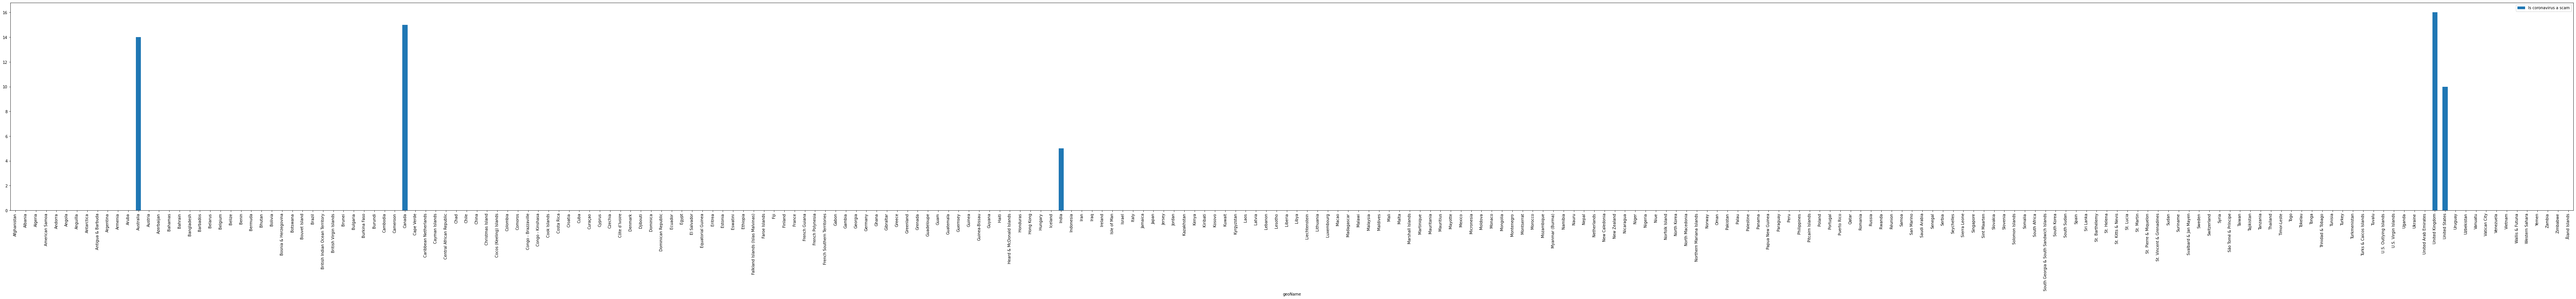

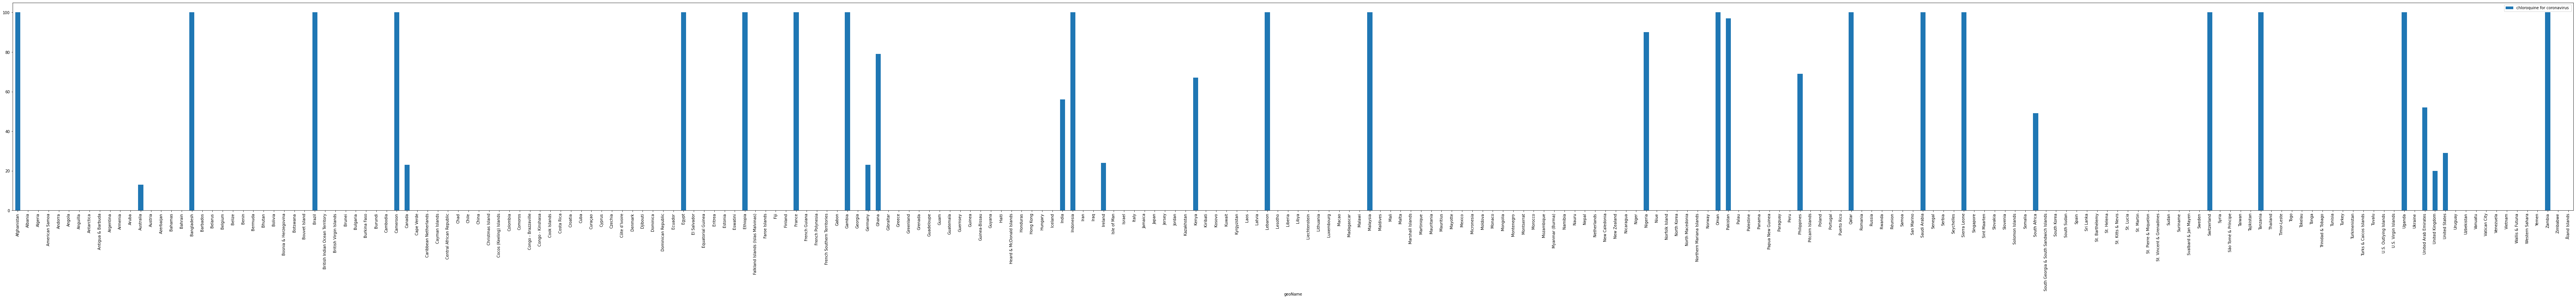

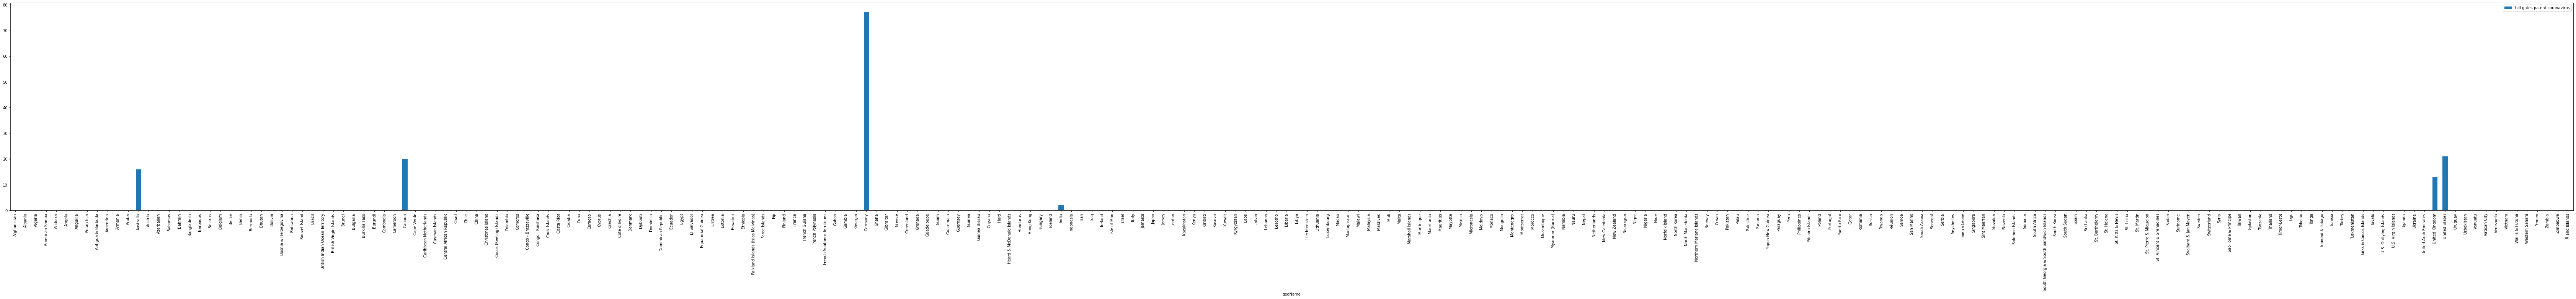

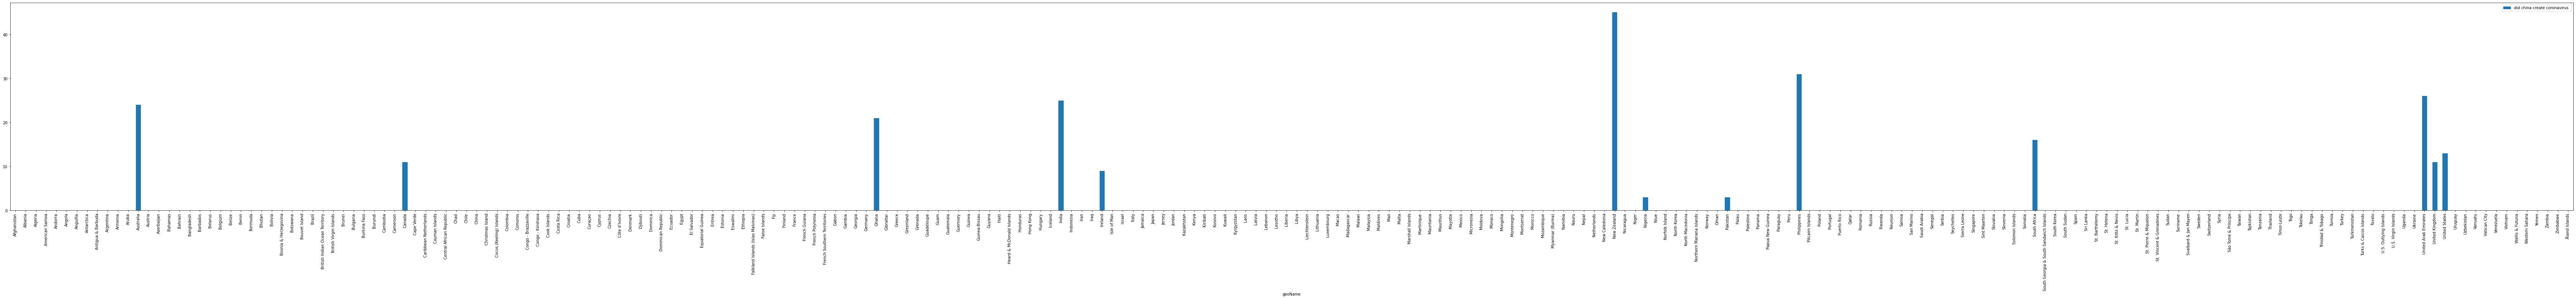

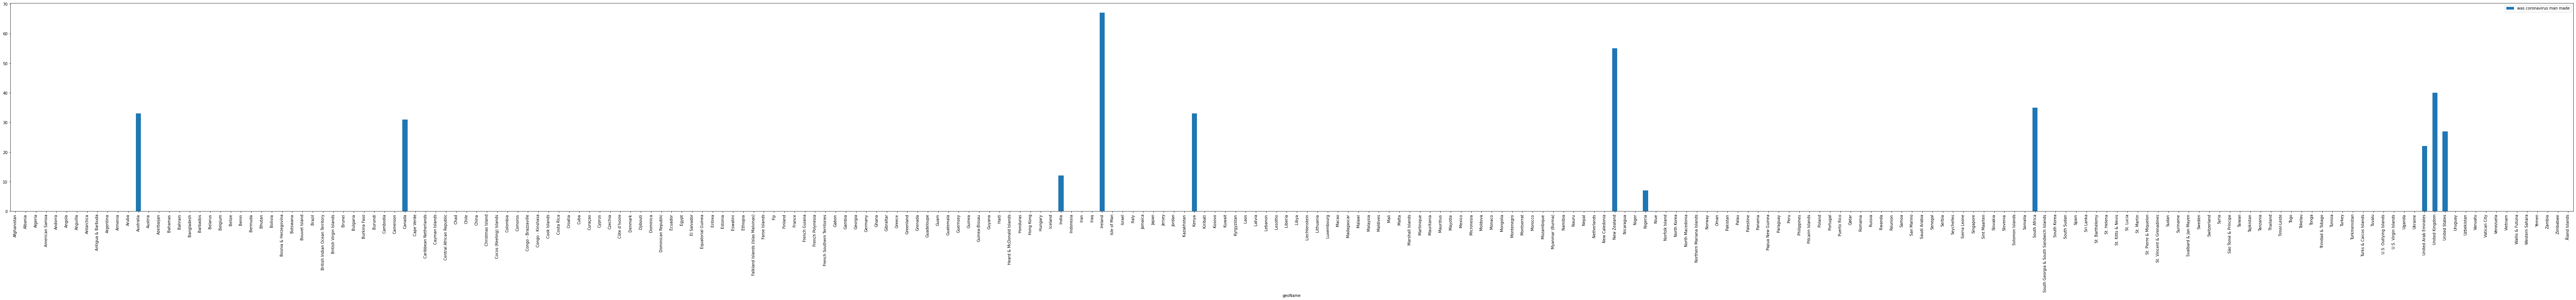

In [35]:
#chloroquine
for i in s_t:
    print(i)
    df.reset_index().plot(x='geoName', y=i, figsize=(120, 10), kind ='bar')